In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set default styles for plots
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # fontsize of the legend
plt.rc('figure', titlesize=18)   # fontsize of the figure title

# Define the two directories
week4_directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/forwards/ArielInstrumentTier2"
week5_directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 5/forwards/ArielInstrumentTier2"

# Read subfolders from both
subfolders_week4 = [name for name in os.listdir(week4_directory) if os.path.isdir(os.path.join(week4_directory, name))]
subfolders_week5 = [name for name in os.listdir(week5_directory) if os.path.isdir(os.path.join(week5_directory, name))]

print(f"Week4 subfolders: {subfolders_week4}")
print(f"Week5 subfolders: {subfolders_week5}")


Week4 subfolders: ['TOI-1801bMig', 'K2-26bFidu', 'TOI-1266cMig', 'LTT3780cFidu', 'HD108236dMig', 'TOI-421bMig', 'GJ1214bMig', 'HD108236eFidu', 'TOI-251bFidu', 'TOI-776cFidu', 'G9-40bFidu', 'K2-26bMig', 'HD108236eMig', 'HD63935bFidu', 'TOI-4336AbFidu', 'TOI-122bMig', 'HD63935bMig', 'HD28109dFidu', 'TOI-269bFidu', 'K2-3bMig', 'HD28109dMig', 'HD109833bFidu', 'TOI-700cFidu', 'TOI-1468cMig', 'HD109833bMig', 'HD63433cFidu', 'TOI-4438bFidu', 'TOI-2136bMig', 'HD63433cMig', 'TOI-1136cFidu', 'LP791-18cFidu', 'HD191939bMig', 'TOI-1136eFidu', 'TOI-1136cMig', 'TOI-270dFidu', 'HD191939cMig', 'TOI-1136gFidu', 'TOI-1136eMig', 'GJ1214bFidu', 'HD191939dMig', 'TOI-421bFidu', 'TOI-1136gMig', 'HD191939bFidu', 'TOI-1266bMig', 'Kepler-109cFidu', 'LTT3780cMig', 'HD191939cFidu', 'G9-40bMig', 'HD191939dFidu', 'TOI-4336AbMig', 'TOI-782bFidu', 'HD108236dFidu', 'TOI-269bMig', 'TOI-2120bFidu', 'TOI-700cMig', 'TOI-904bFidu', 'TOI-4438bMig', 'TOI-1470cFidu', 'LP791-18cMig', 'TOI-663cFidu', 'TOI-251bMig', 'TOI-270dMig

['piMenc', 'TOI-1468c', 'TOI-251b', 'TOI-782b', 'K2-138f', 'TOI-1136e', 'TOI-1266b', 'TOI-1470c', 'TOI-561c', 'LTT3780c', 'HD110113b', 'HD191939c', 'TOI-1136b', 'HIP94235b', 'HD28109d', 'Kepler-109c', 'TOI-700c', 'TOI-776b', 'TOI-270c', 'TOI-1136g', 'TOI-1470b', 'TOI-4336Ab', 'G9-40b', 'HD191939d', 'TOI-421b', 'K2-3b', 'HD108236e', 'HD63433b', 'TOI-776c', 'TOI-904b', 'TOI-2136b', 'TOI-1136c', 'TOI-663c', 'TOI-269b', 'HD63433c', 'TOI-1801b', 'K2-26b', 'GJ1214b', 'HD108236d', 'TOI-451c', 'HD86226c', 'TOI-2015b', 'TOI-4479b', 'LP791-18c', 'HD63935b', 'GJ3090b', 'HD191939b', 'TOI-1266c', 'HD93963Ac', 'HD109833b', 'K2-138g', 'K2-417b', 'TOI-122b', 'TOI-663b', 'K2-25b', 'TOI-2120b', 'TOI-1201b', 'TOI-270d', 'TOI-4438b']


/tmp/ipykernel_2729551/1466719874.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 6))


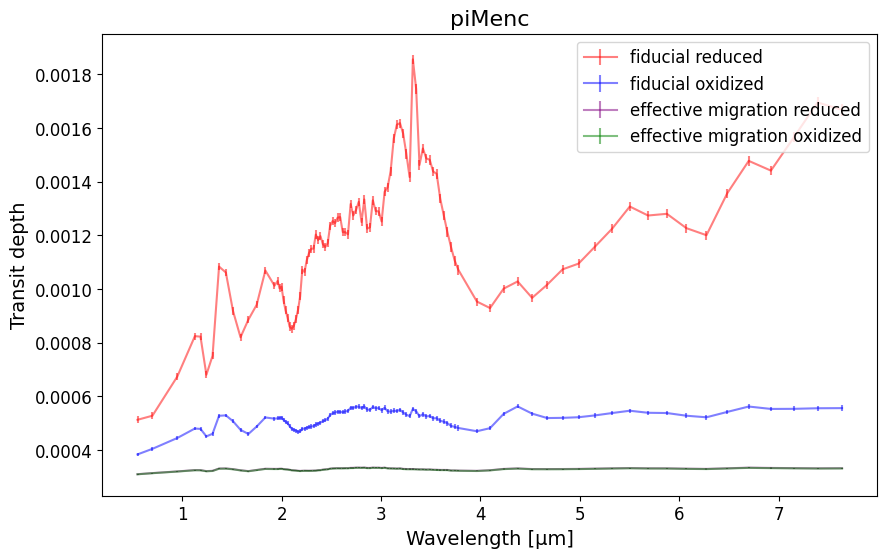

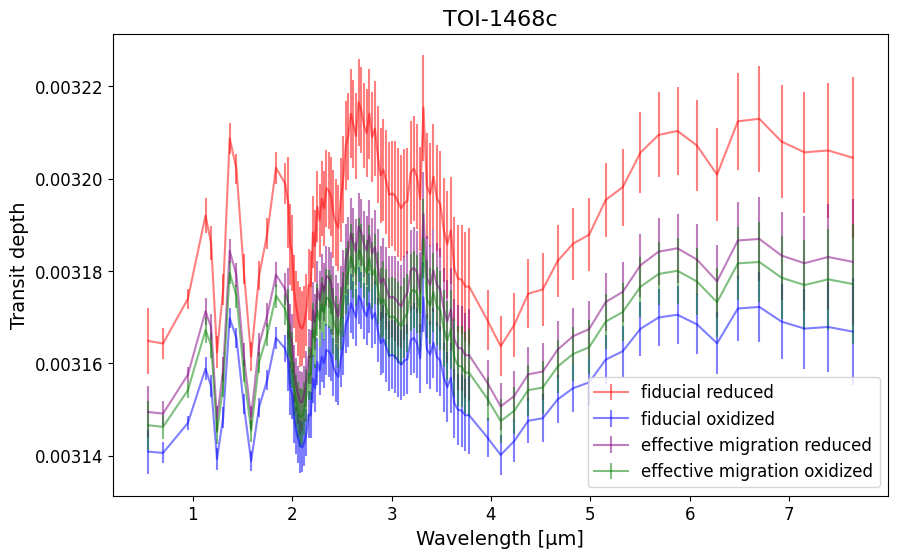

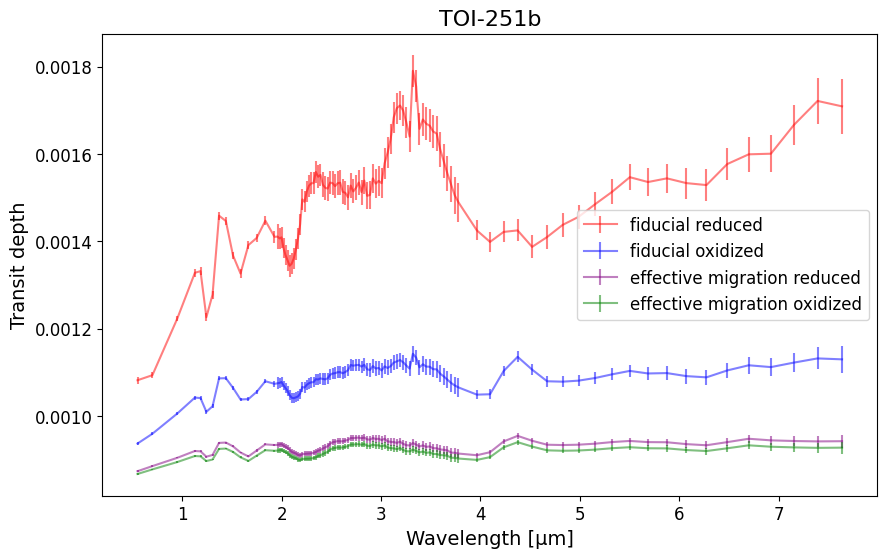

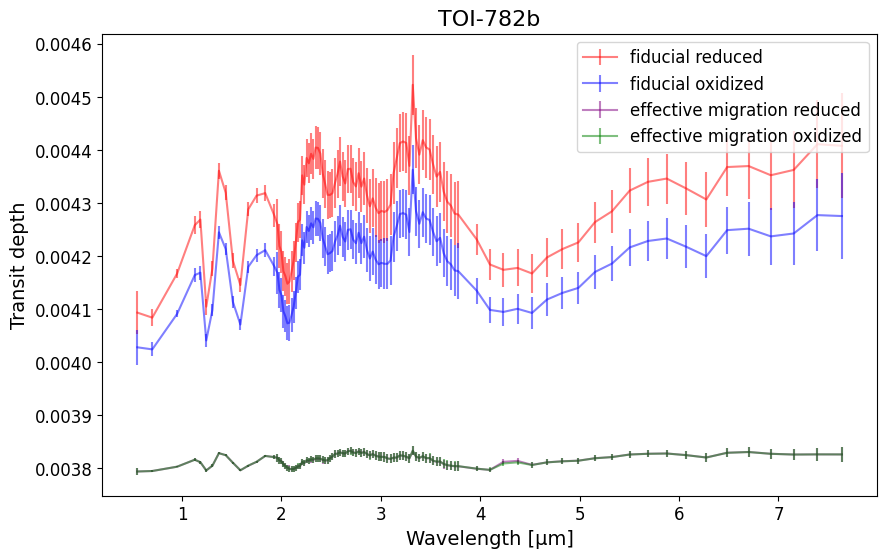

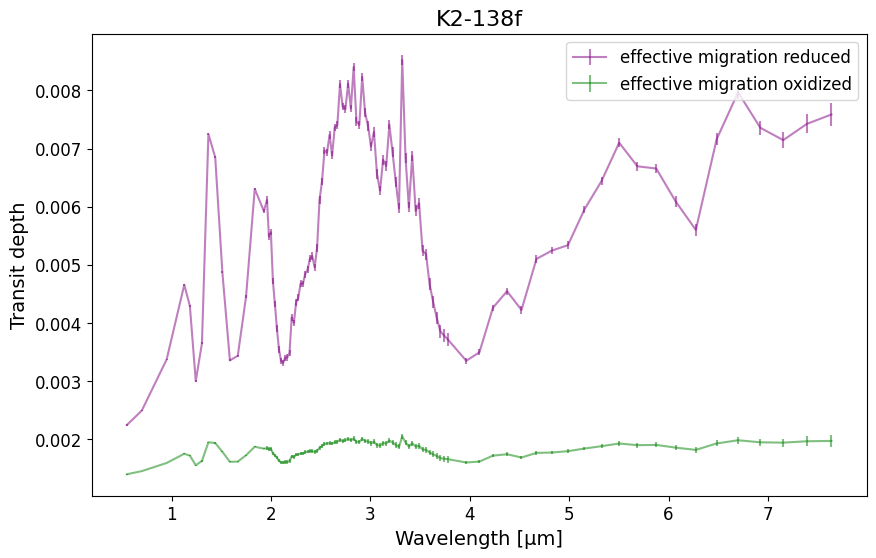

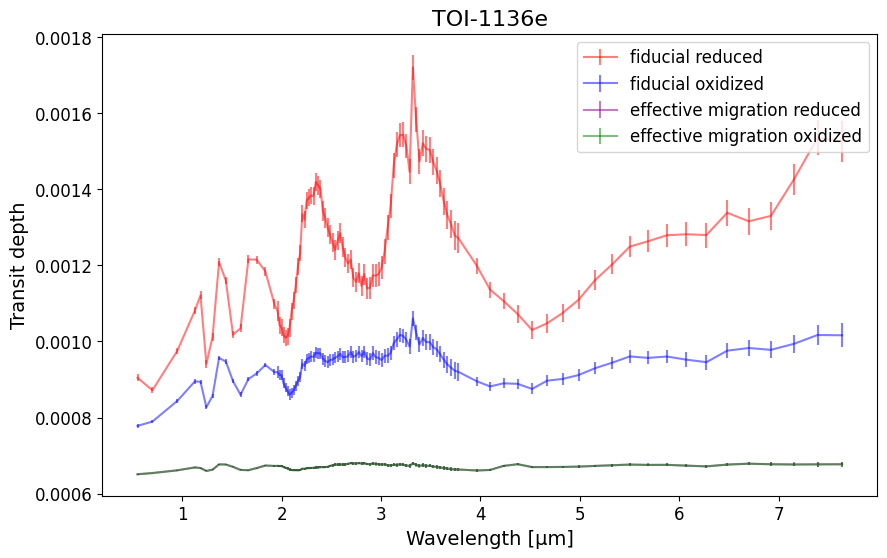

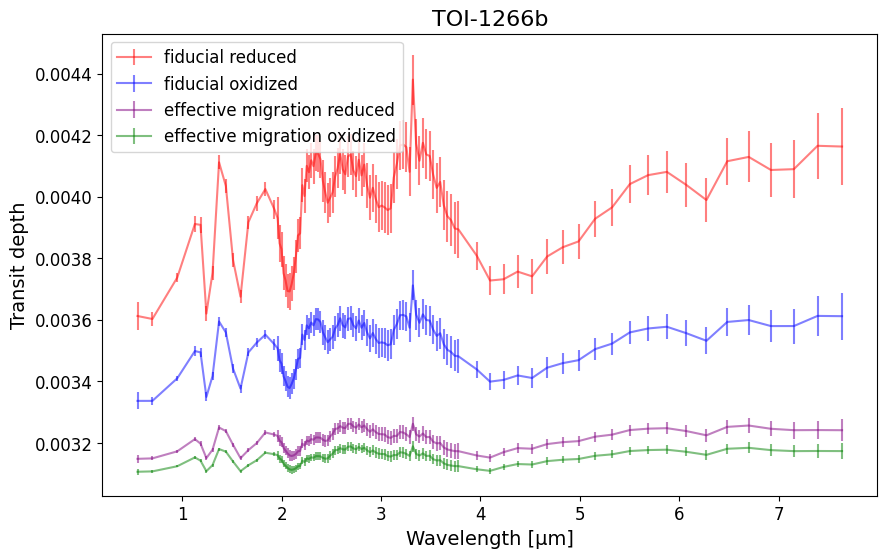

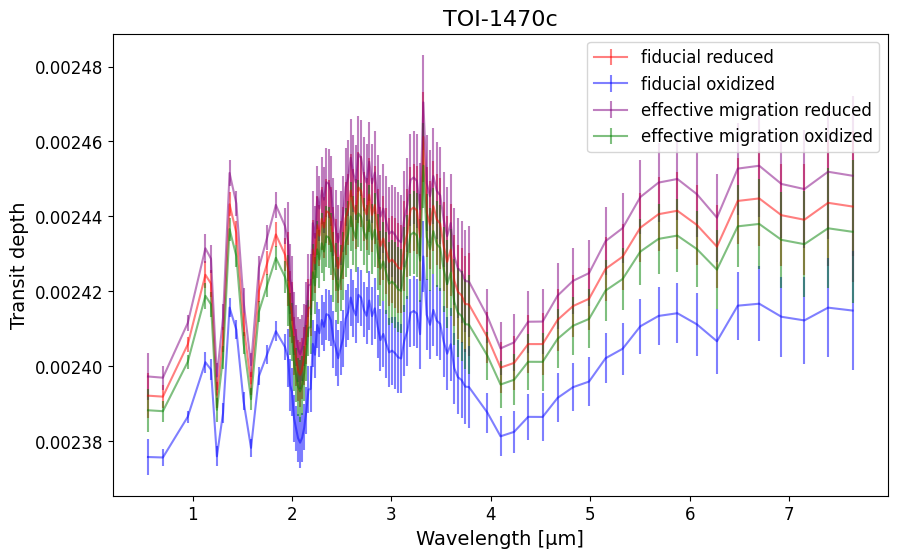

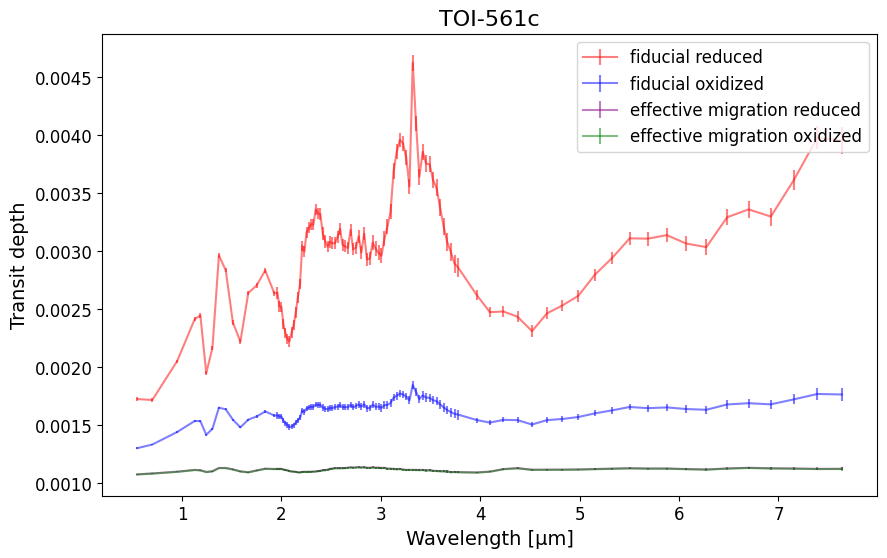

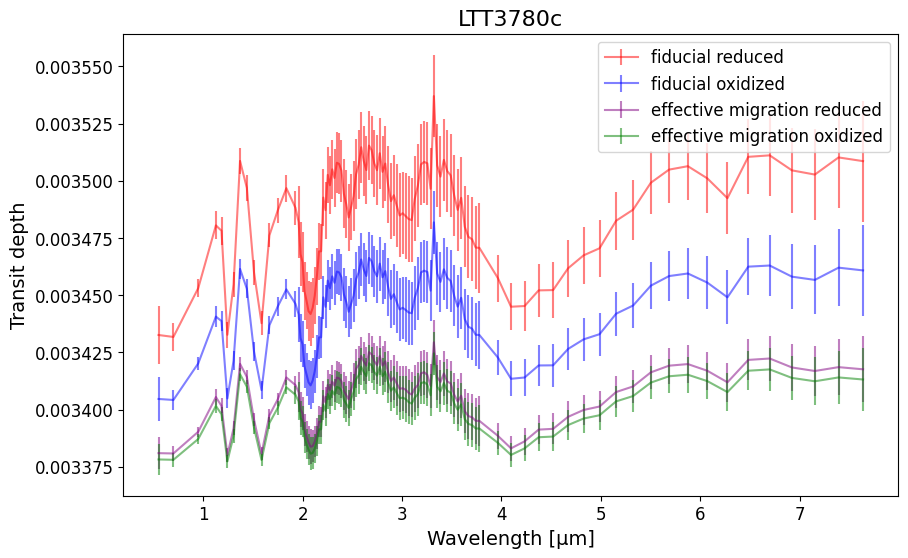

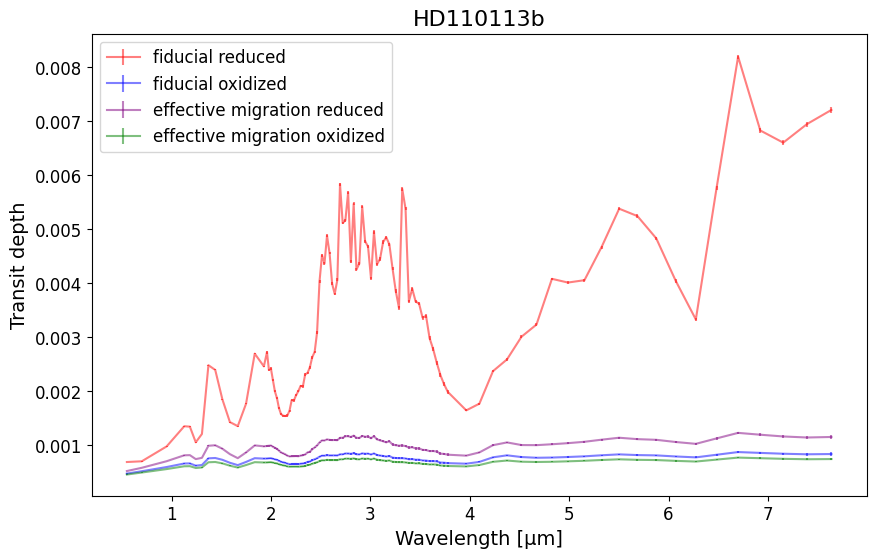

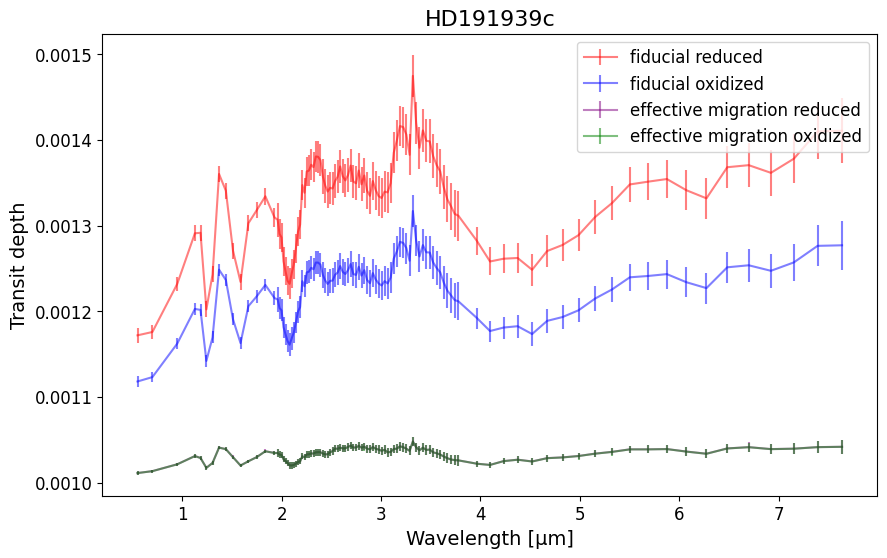

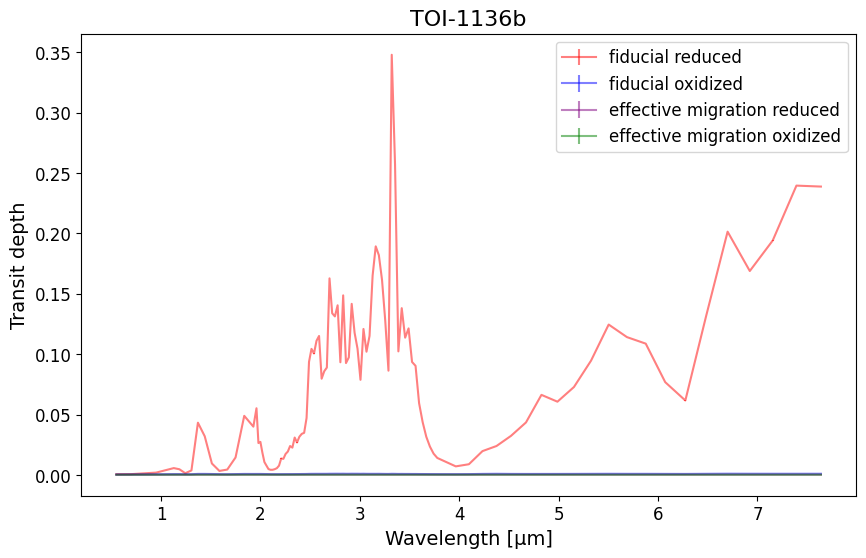

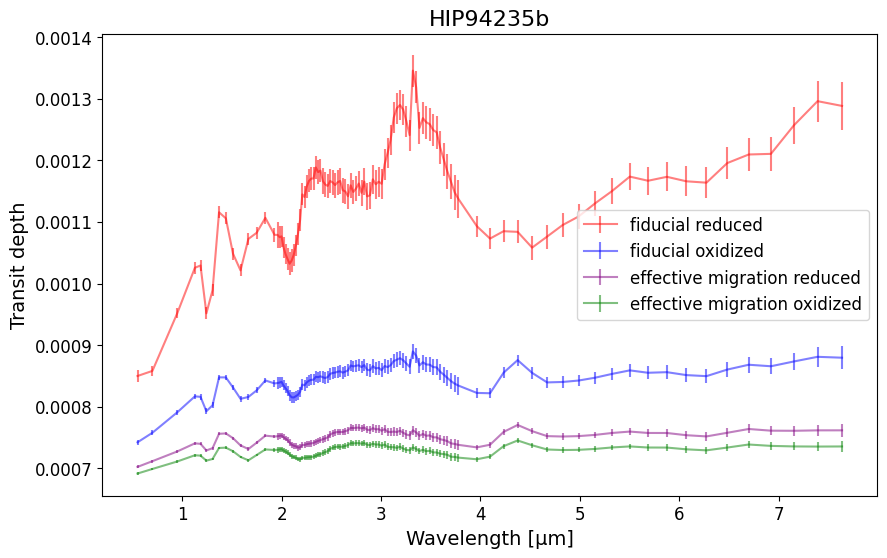

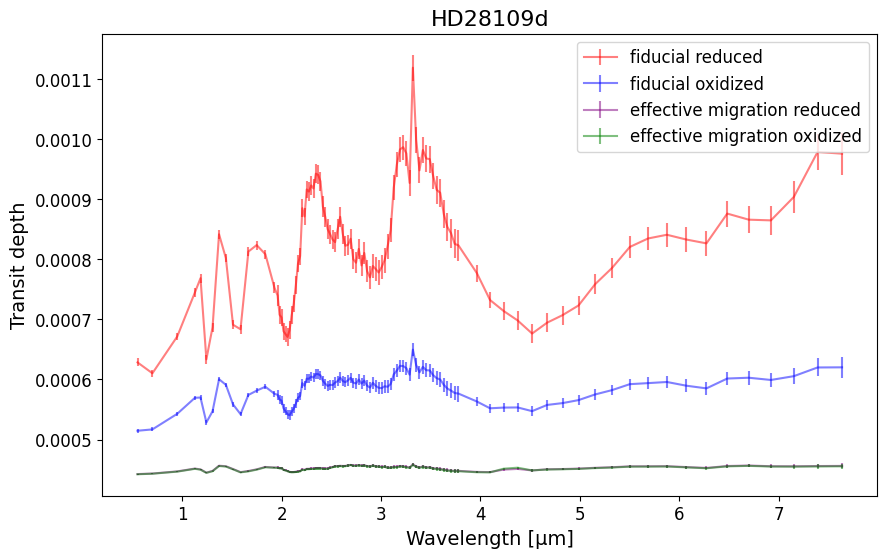

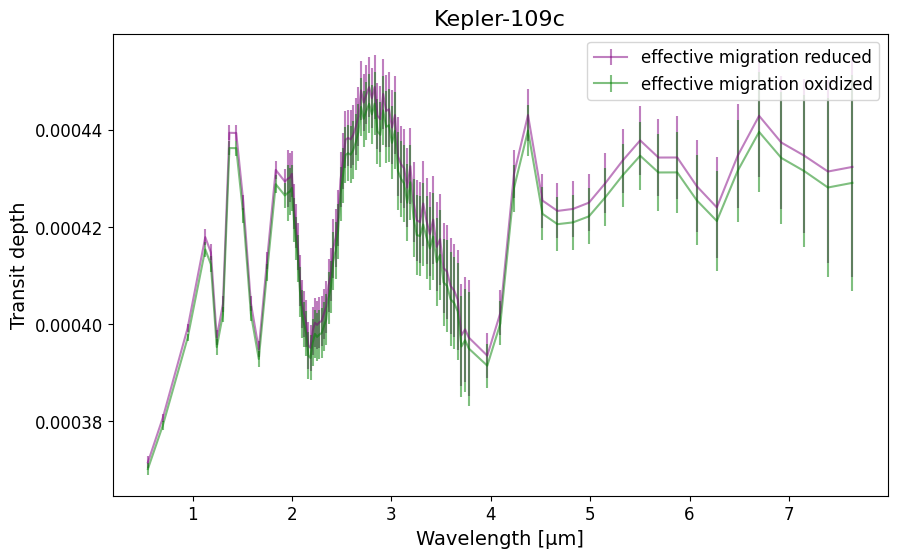

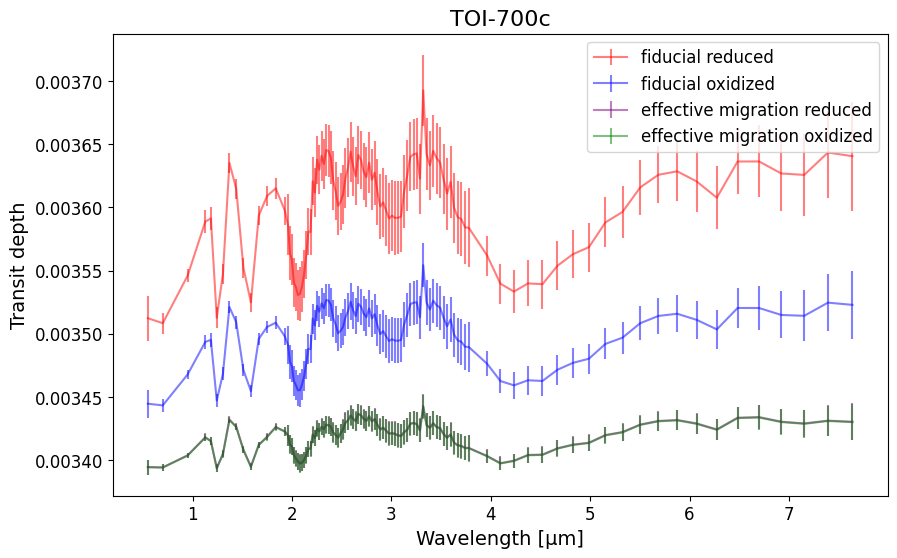

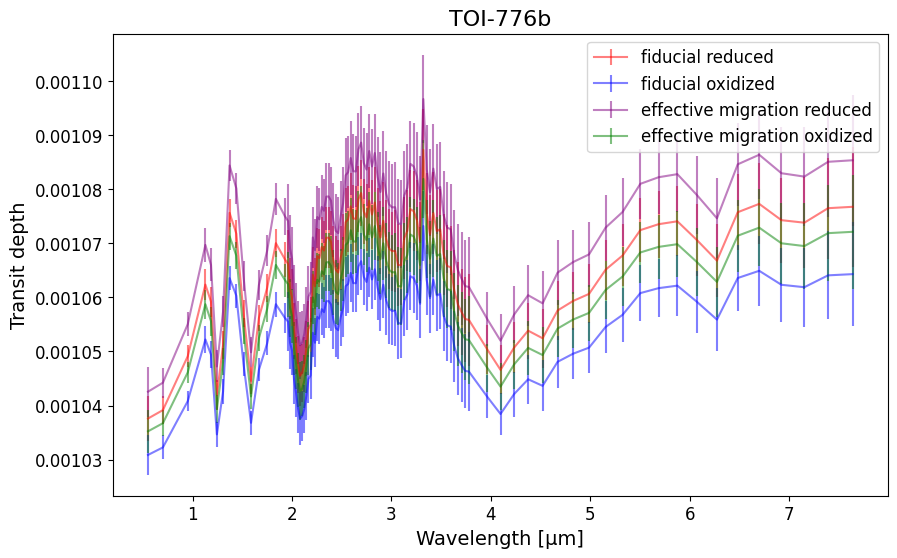

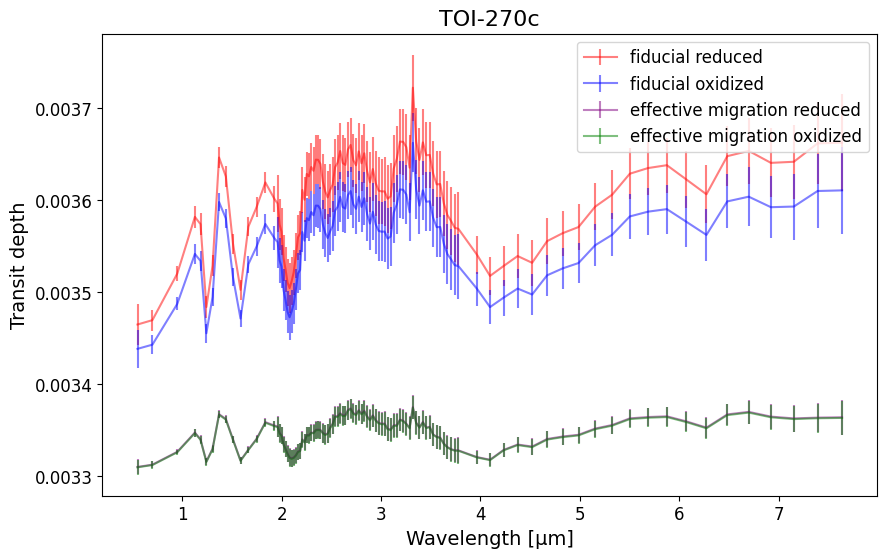

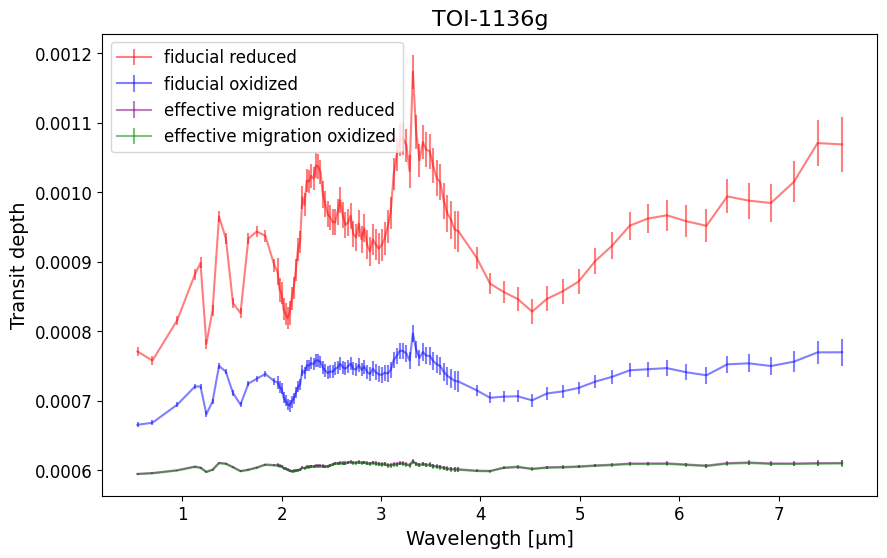

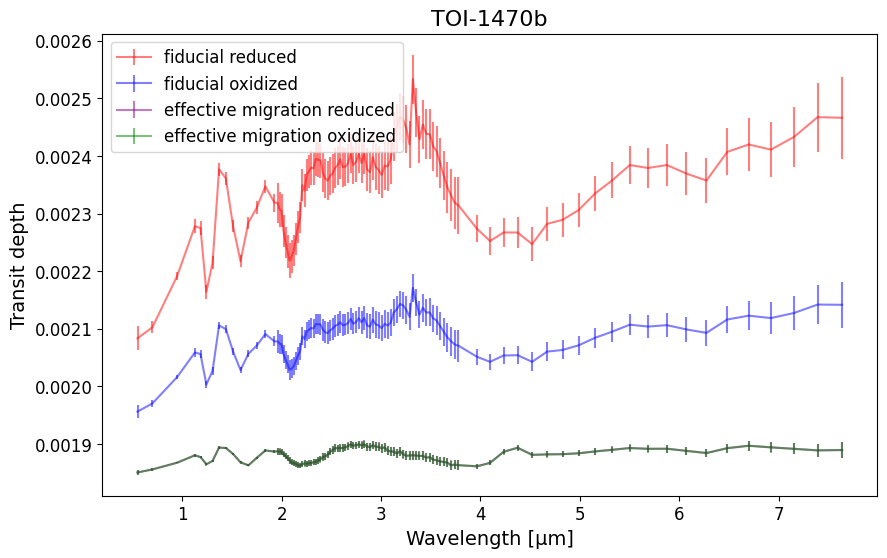

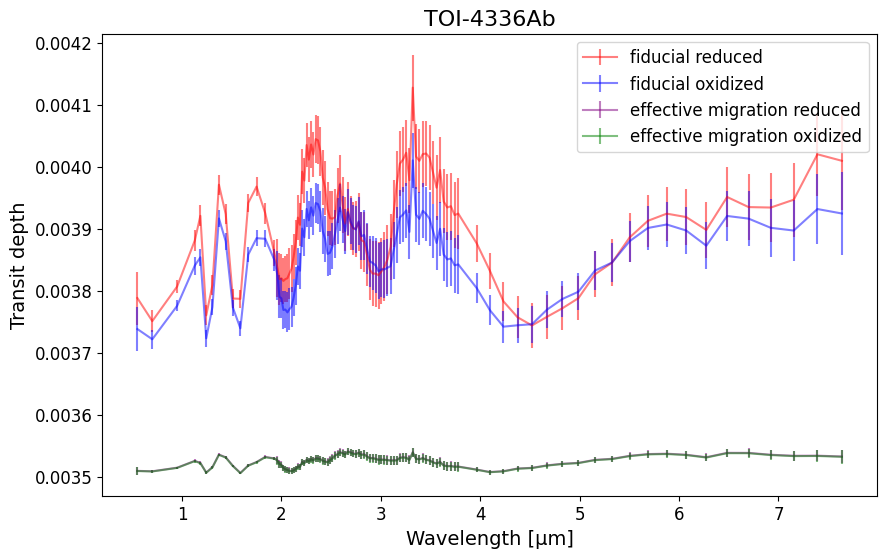

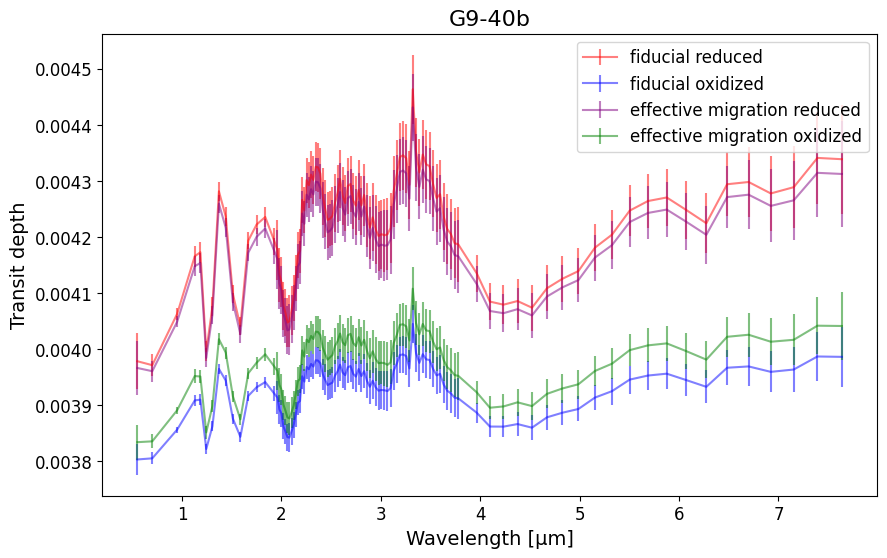

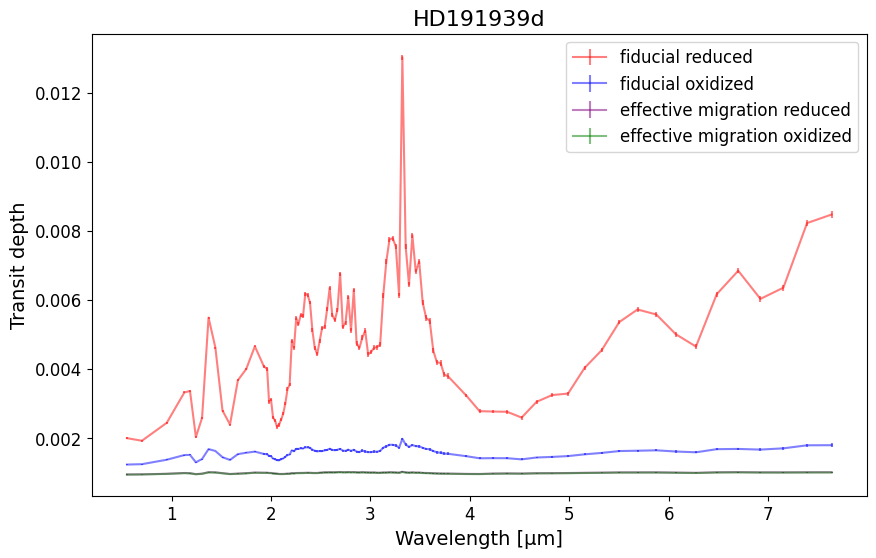

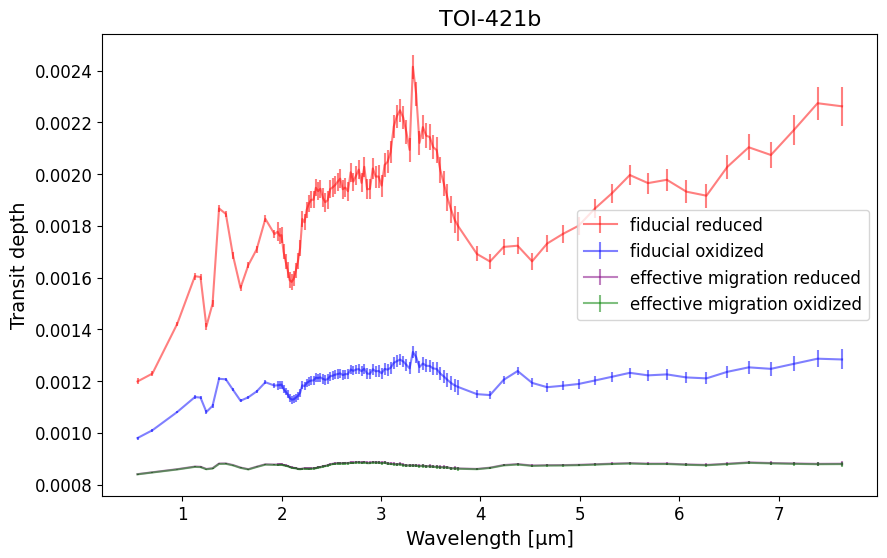

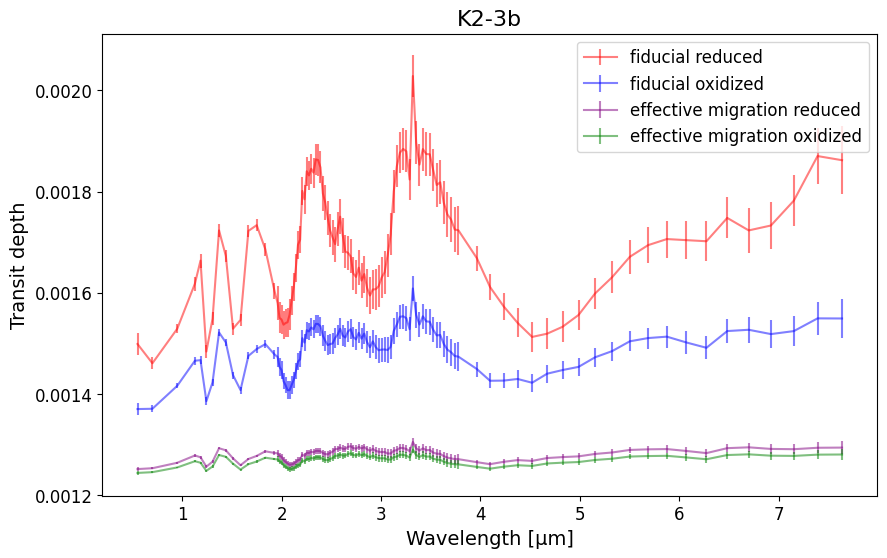

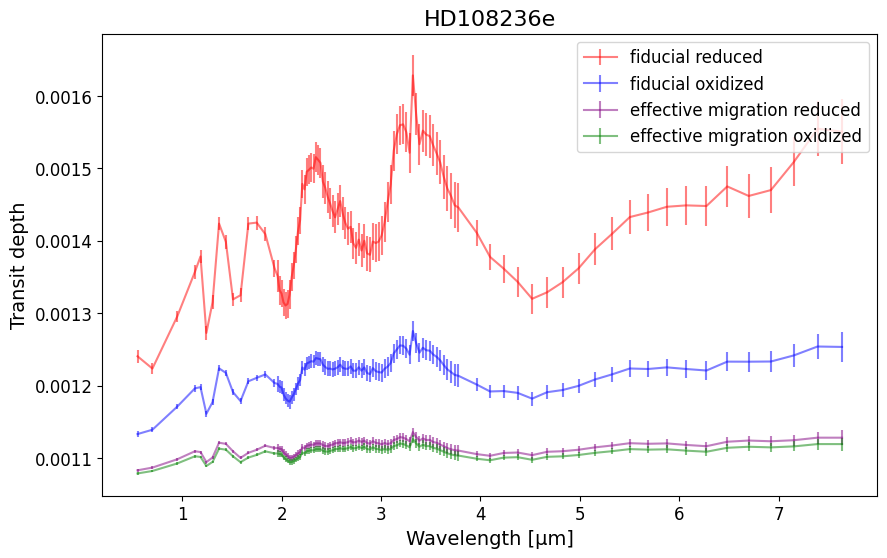

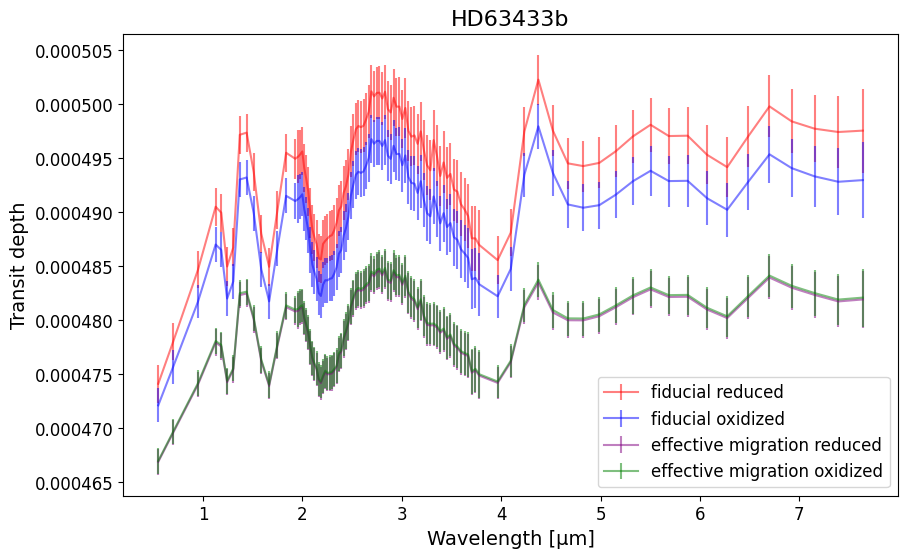

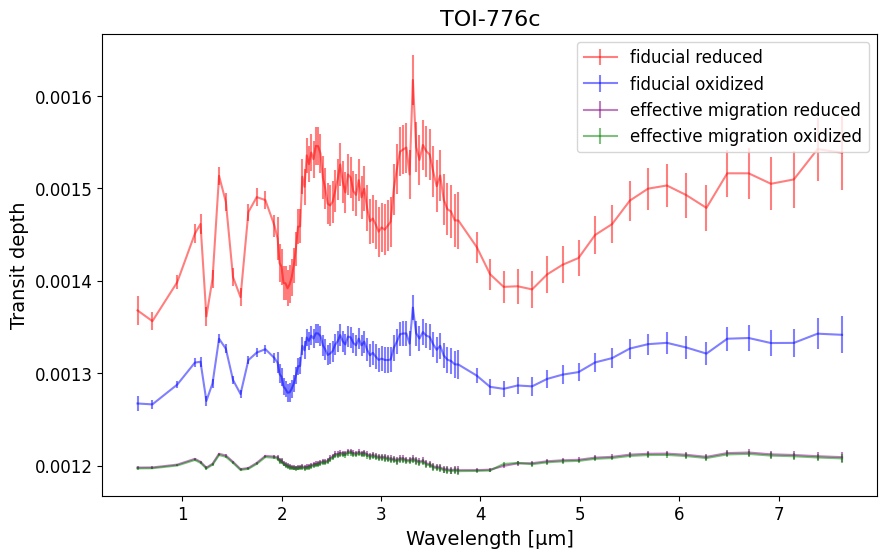

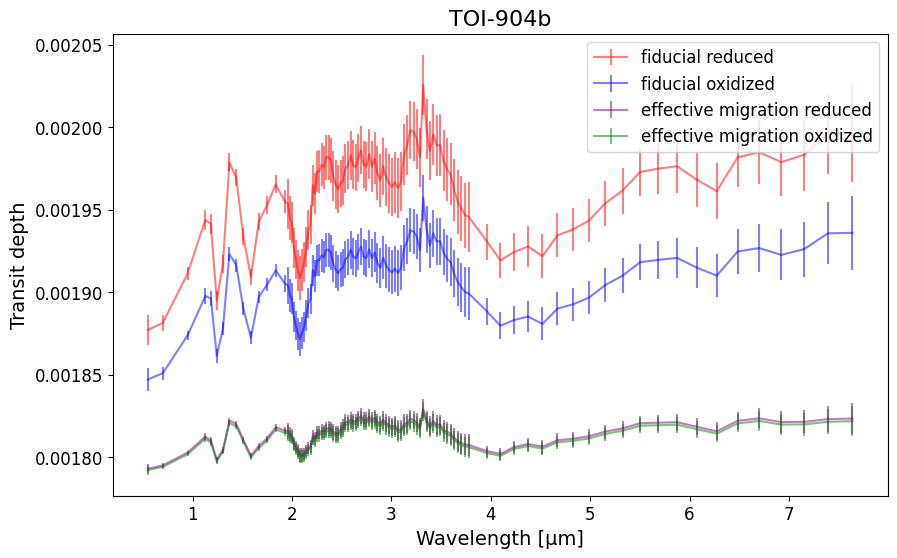

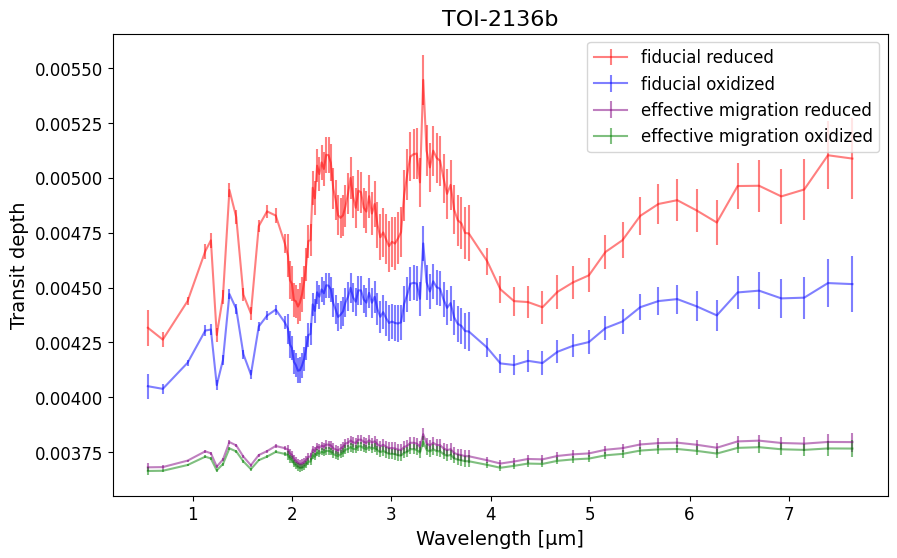

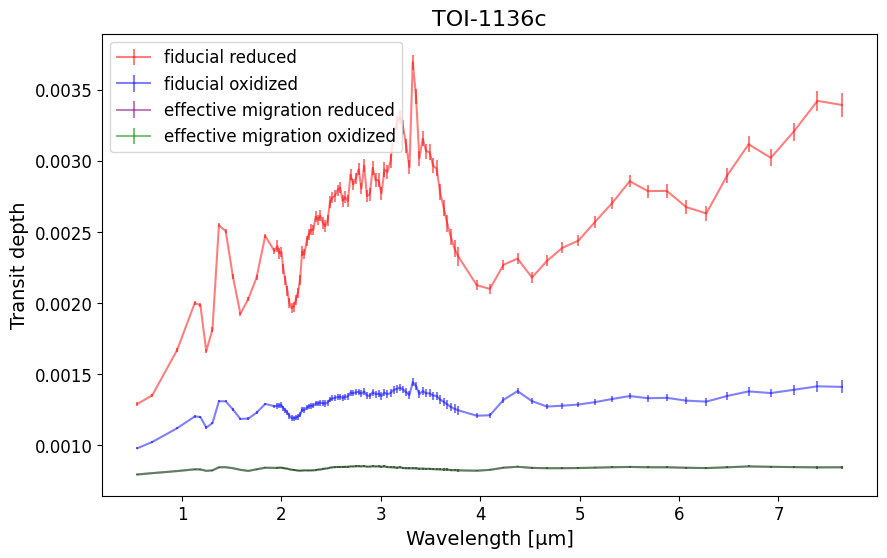

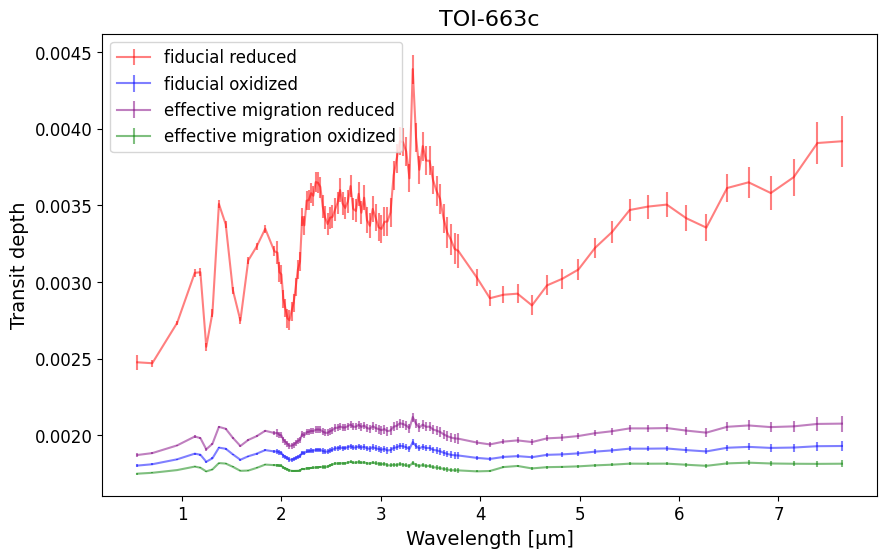

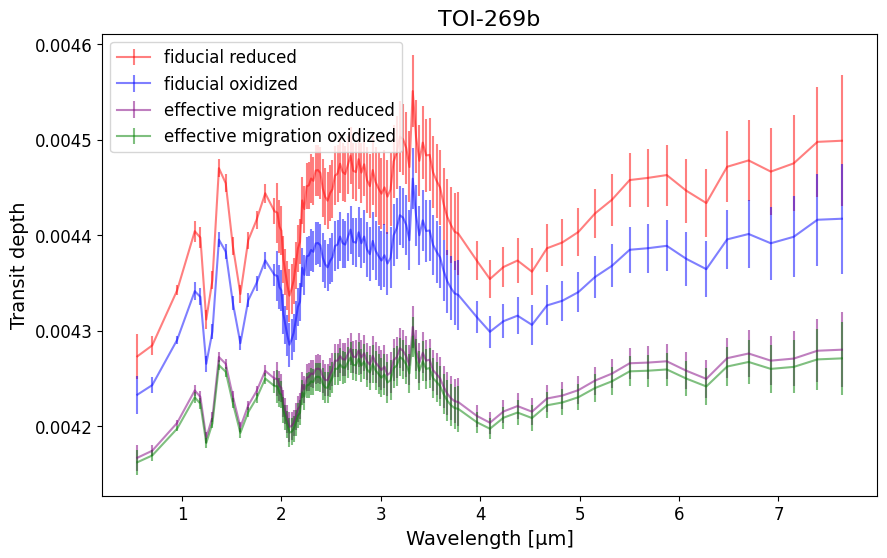

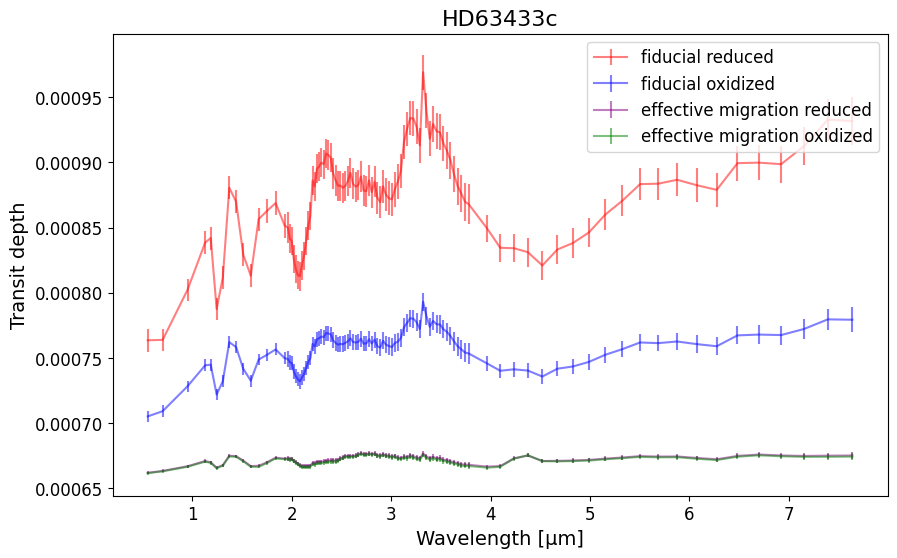

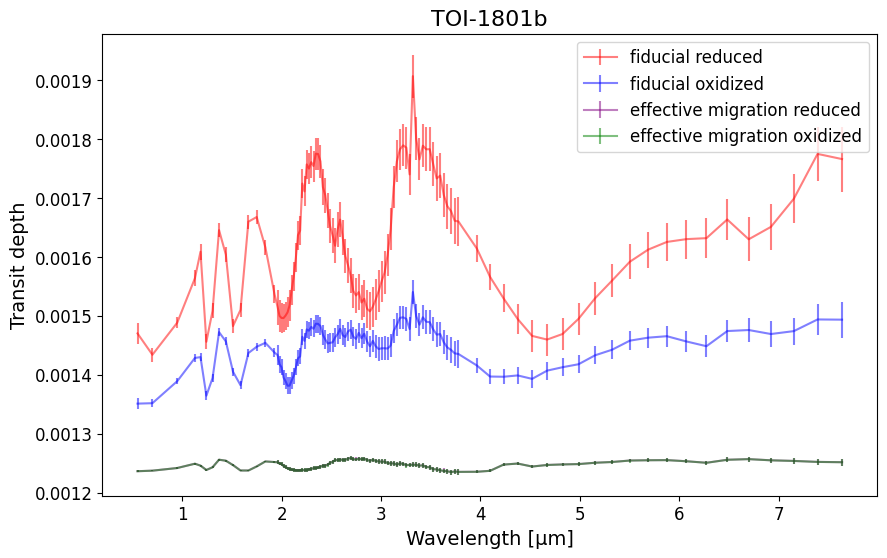

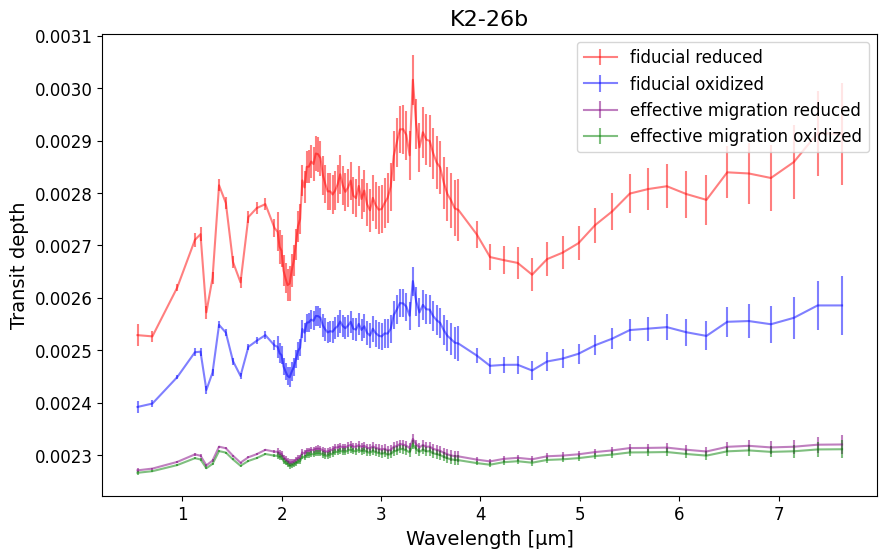

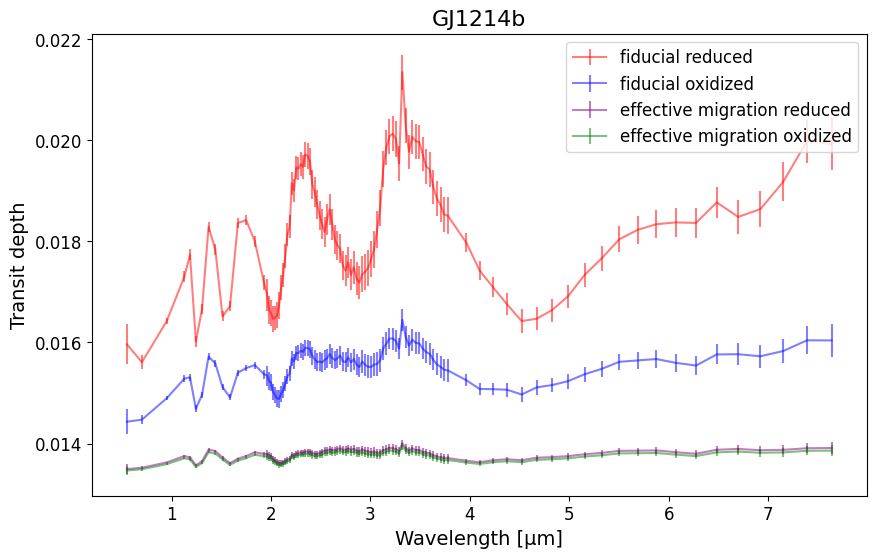

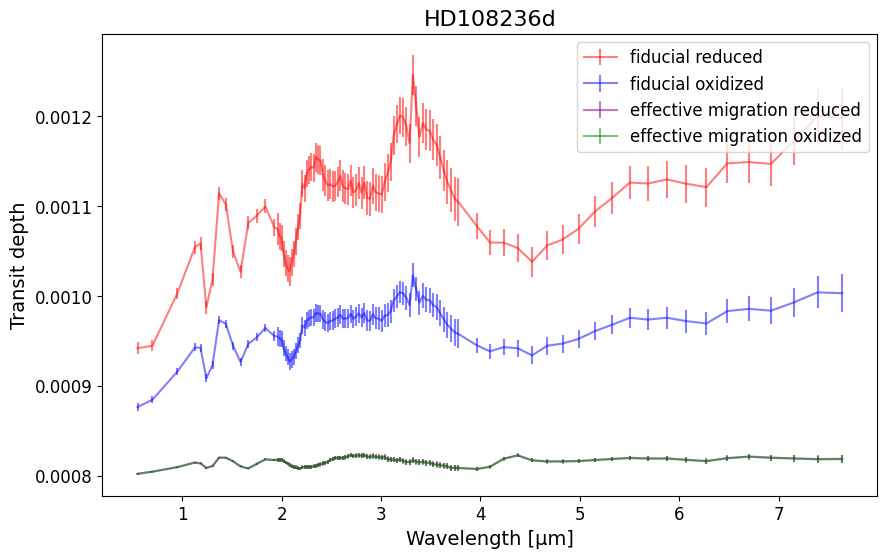

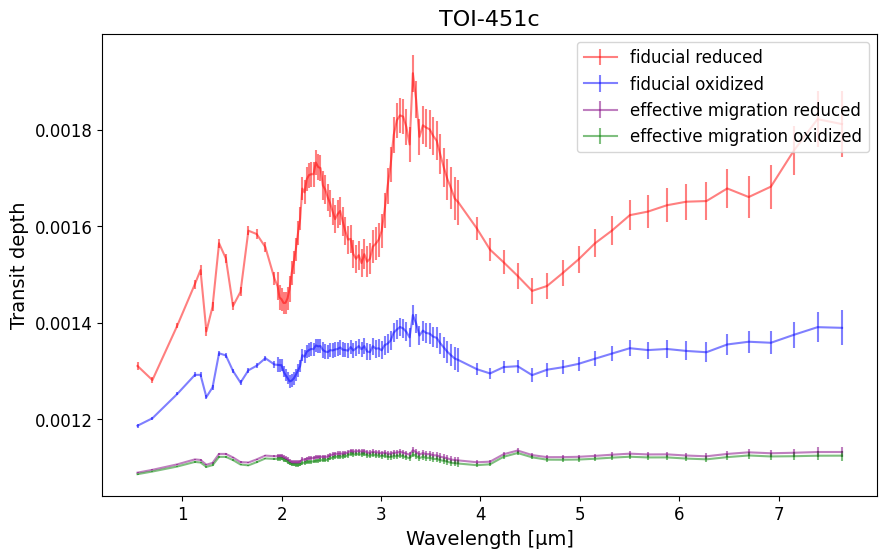

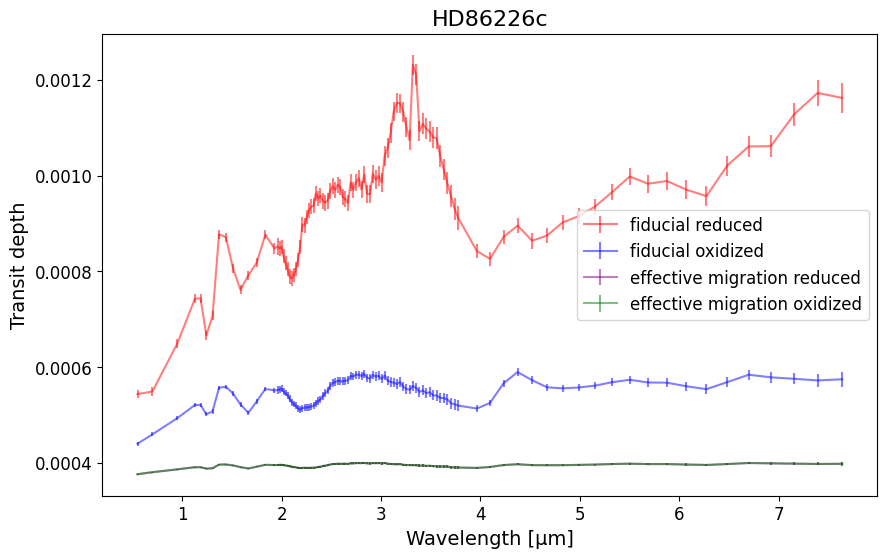

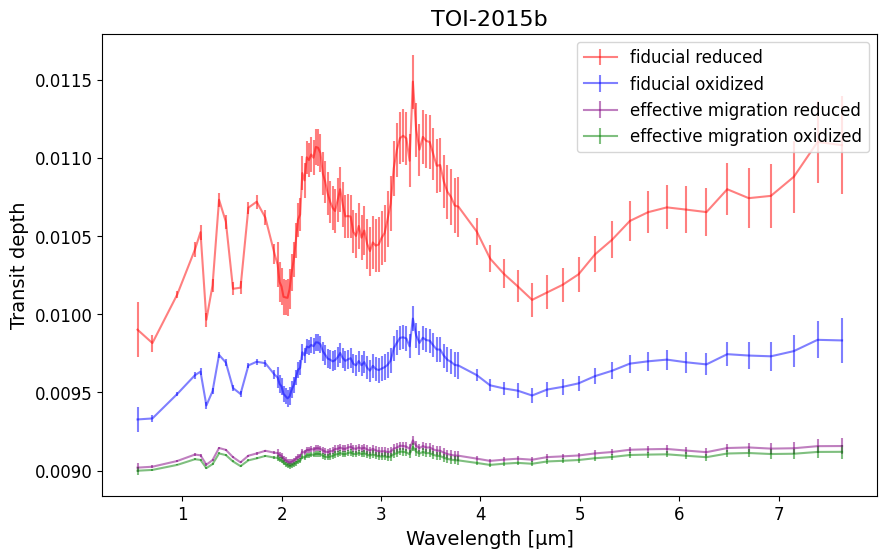

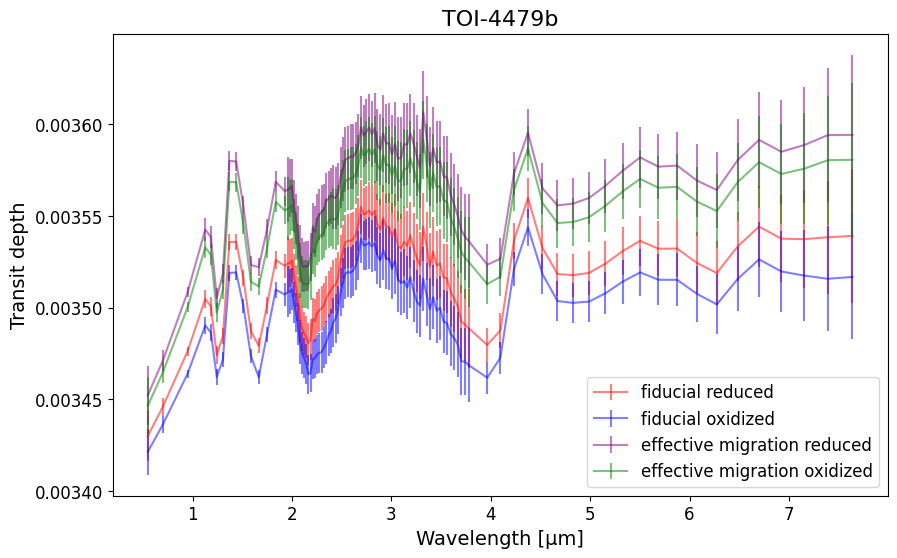

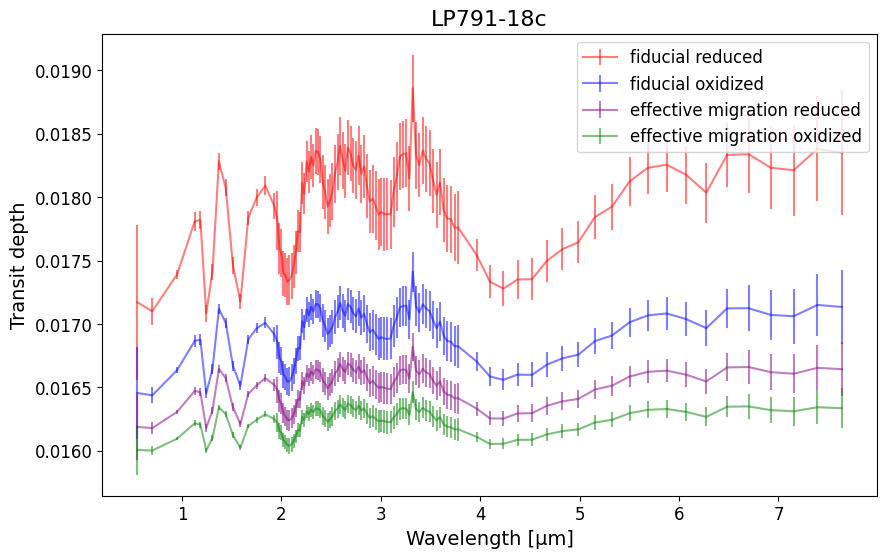

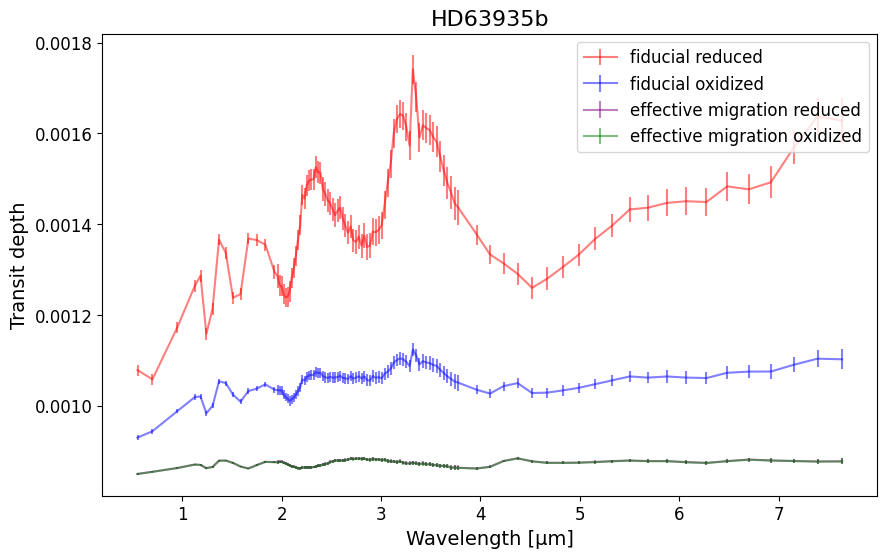

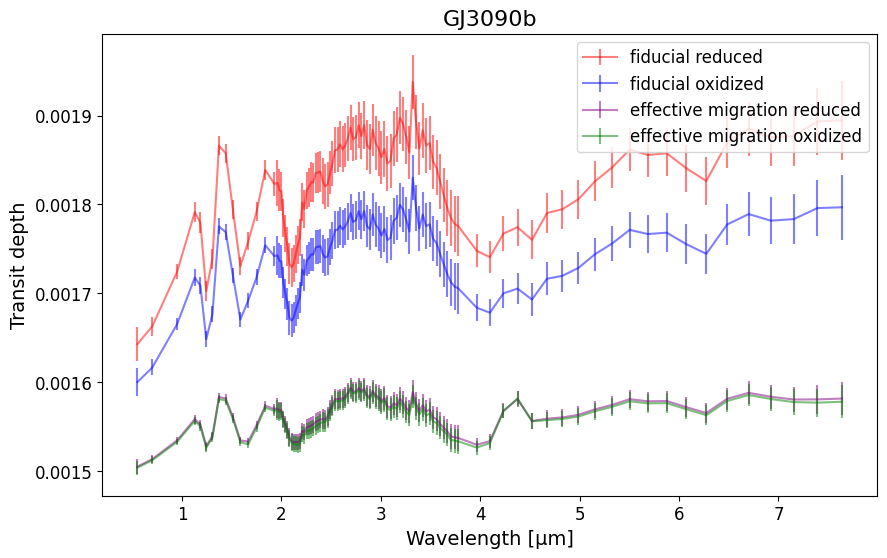

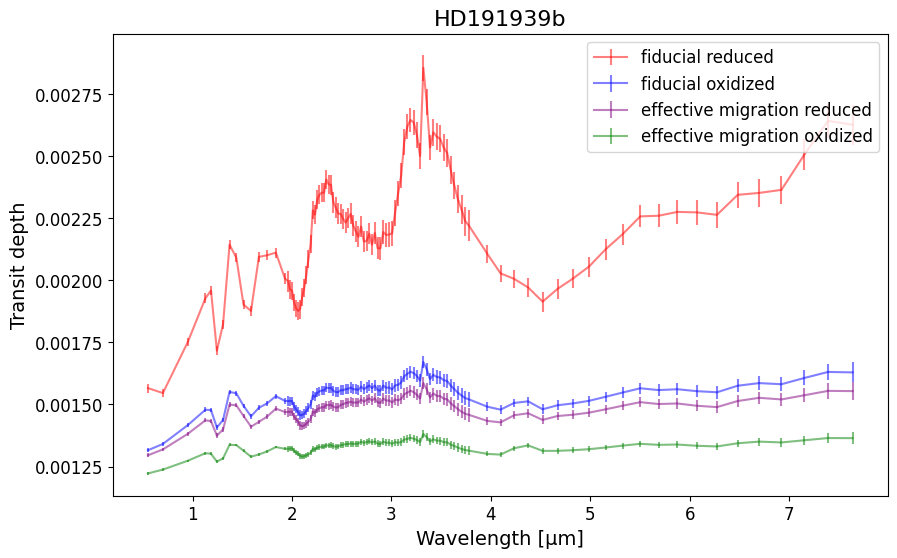

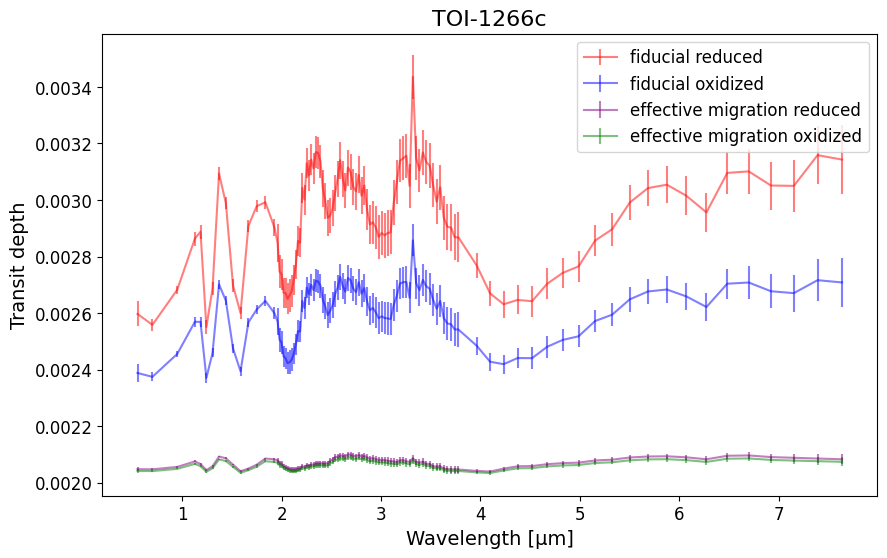

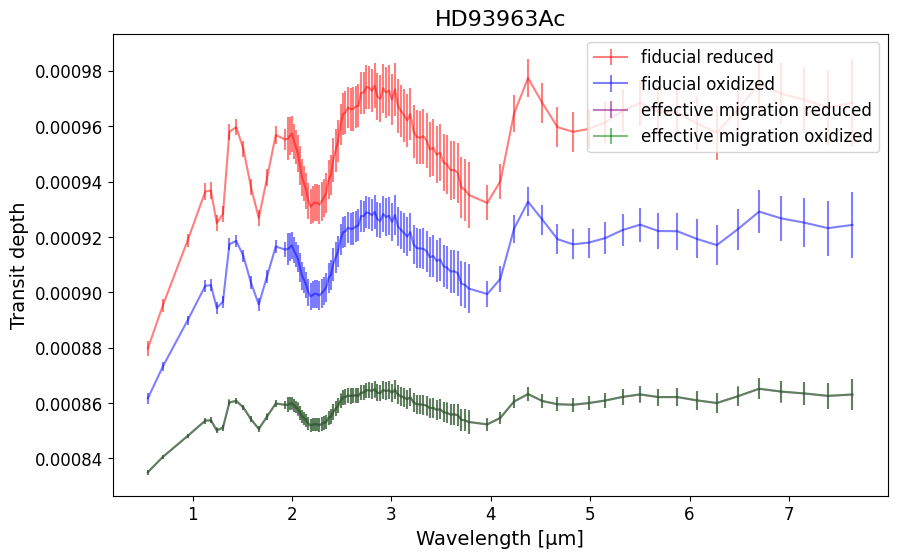

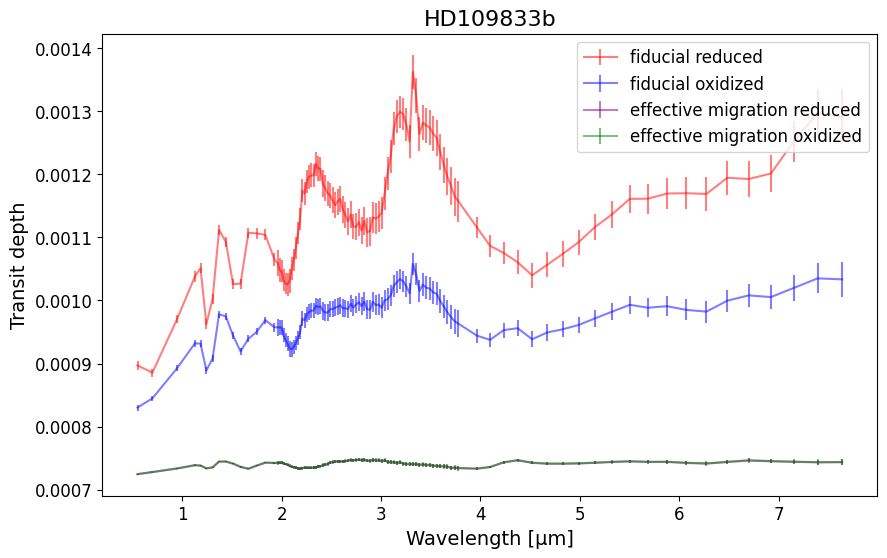

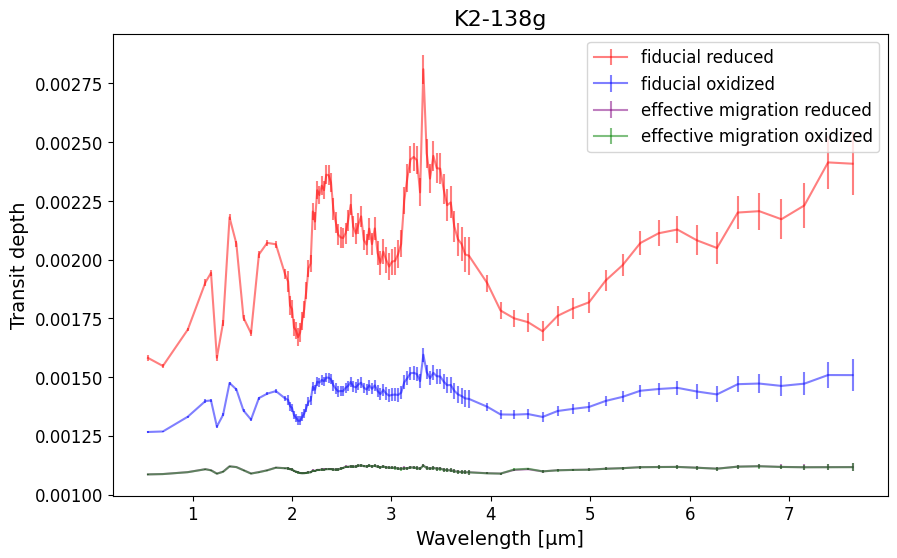

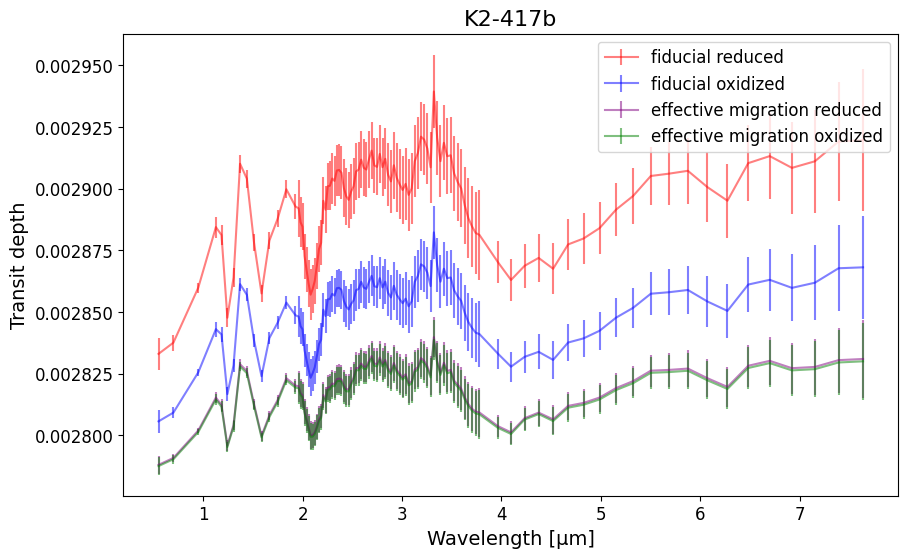

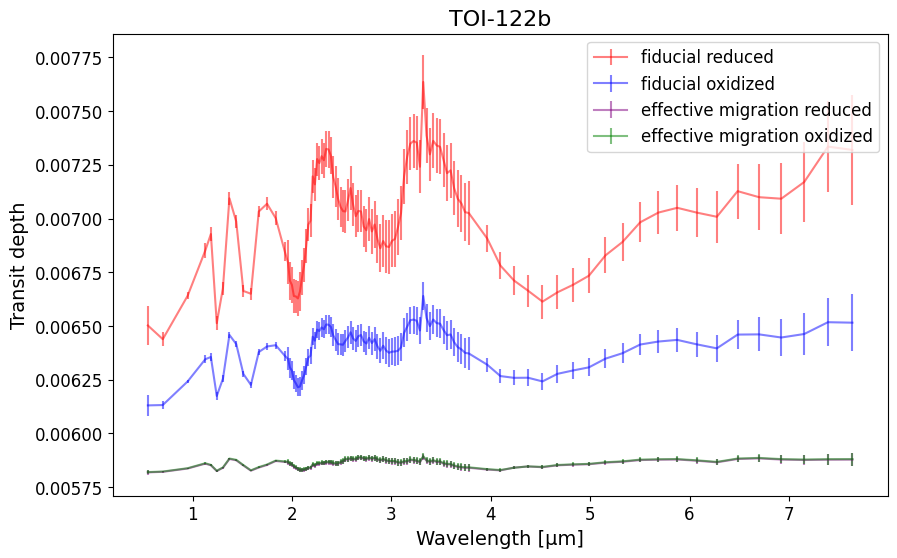

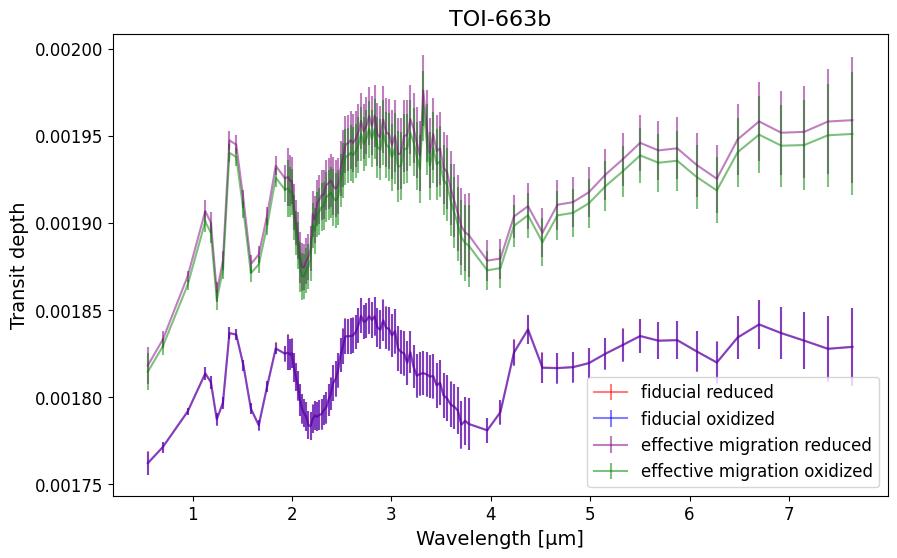

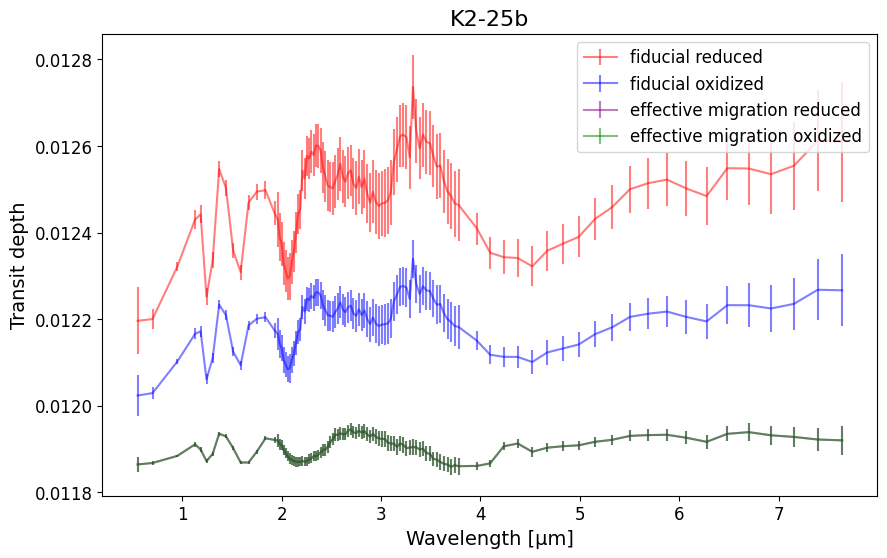

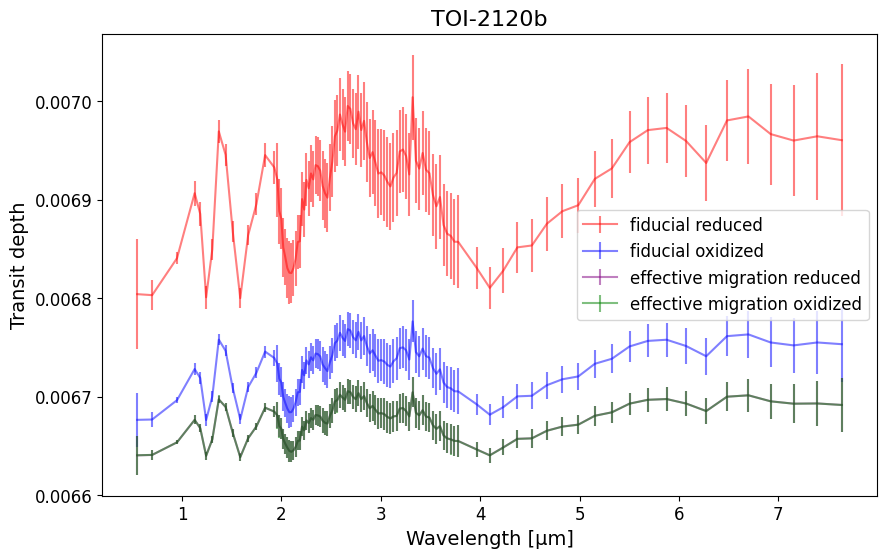

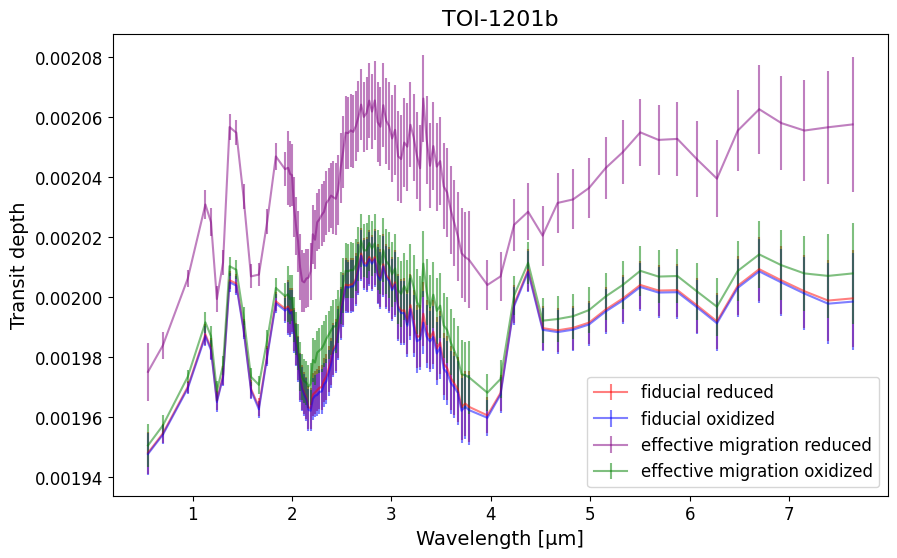

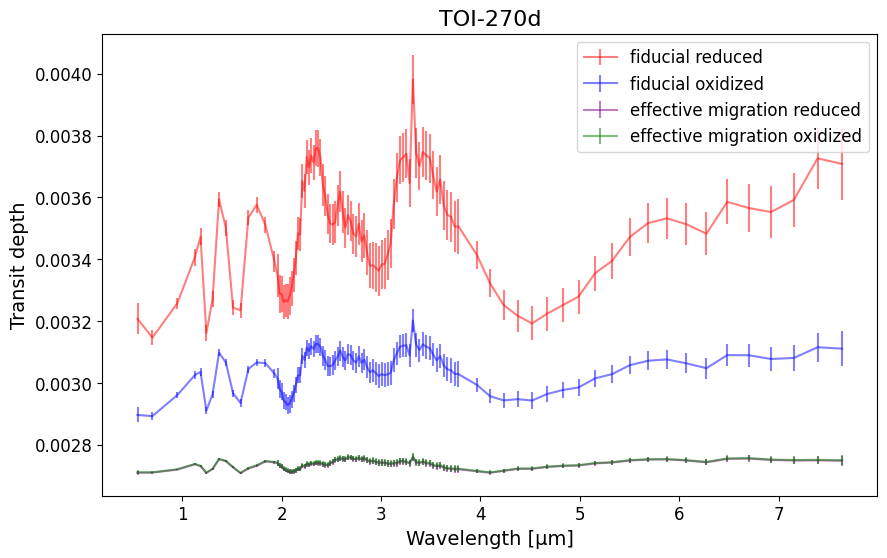

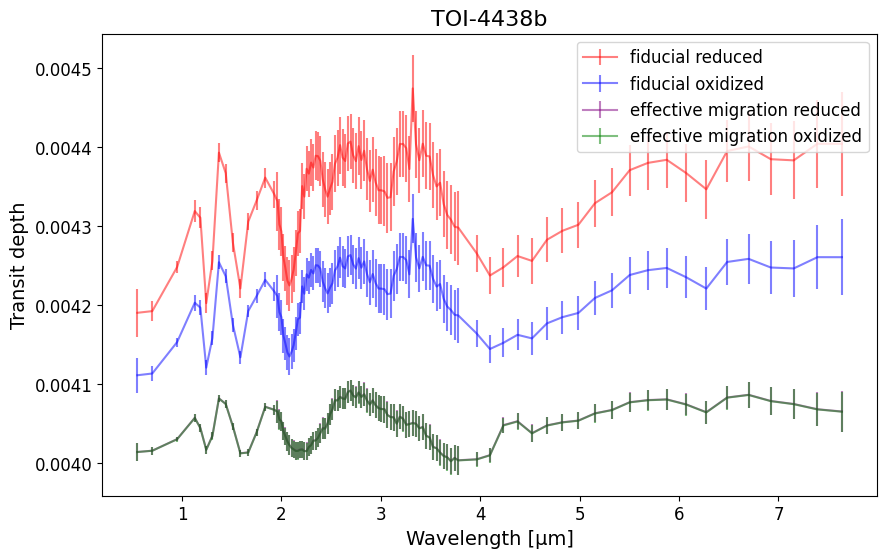

In [46]:
# Example plotting

# Define the planet you are interested in
pls = [name.replace("Mig", "").replace("Fidu", "").replace("R", "") for name in subfolders_week5]
pls.sort()
pls = list(set(pls))
print(pls)

# "Kepler-109cb"

# Define expected modes and corresponding colours
modes = ['FiduR', 'Fidu', 'MigR', 'Mig']   # Order matters: 0=red, 1=blue, 2=purple, 3=green
colors = ['red', 'blue', 'purple', 'green']

for pl in pls:
    fig = plt.figure(figsize=(10, 6))

    for mode, color in zip(modes, colors):
        # Try to find the file with the current mode
        possible_names = [
            f"{pl}{mode}",
            f"{pl}_{mode}",  # just in case there is an underscore
        ]
        file_found = None

        for name in possible_names:
            if name in subfolders_week5:
                file_found = (week5_directory, name)
                break
            elif name in subfolders_week4:
                file_found = (week4_directory, name)
                break

        if file_found is None:
            # No file for this mode, skip
            continue

        directory, file_ = file_found
        path = os.path.join(directory, file_, file_ + '.txt')

        try:
            data = np.loadtxt(path).T
            if np.isnan(data[1]).all():
                continue
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue

        # Build label
        label = "effective migration" if "Mig" in file_ else "fiducial"
        label += " reduced" if "R" in file_ else " oxidized"

        # Plot
        plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.5, label=label, color=color)

    plt.title(f"{pl}")
    plt.legend()
    plt.xlabel('Wavelength [μm]')
    plt.ylabel('Transit depth')
    plt.savefig(f"plots/{pl}.png", dpi=300)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]


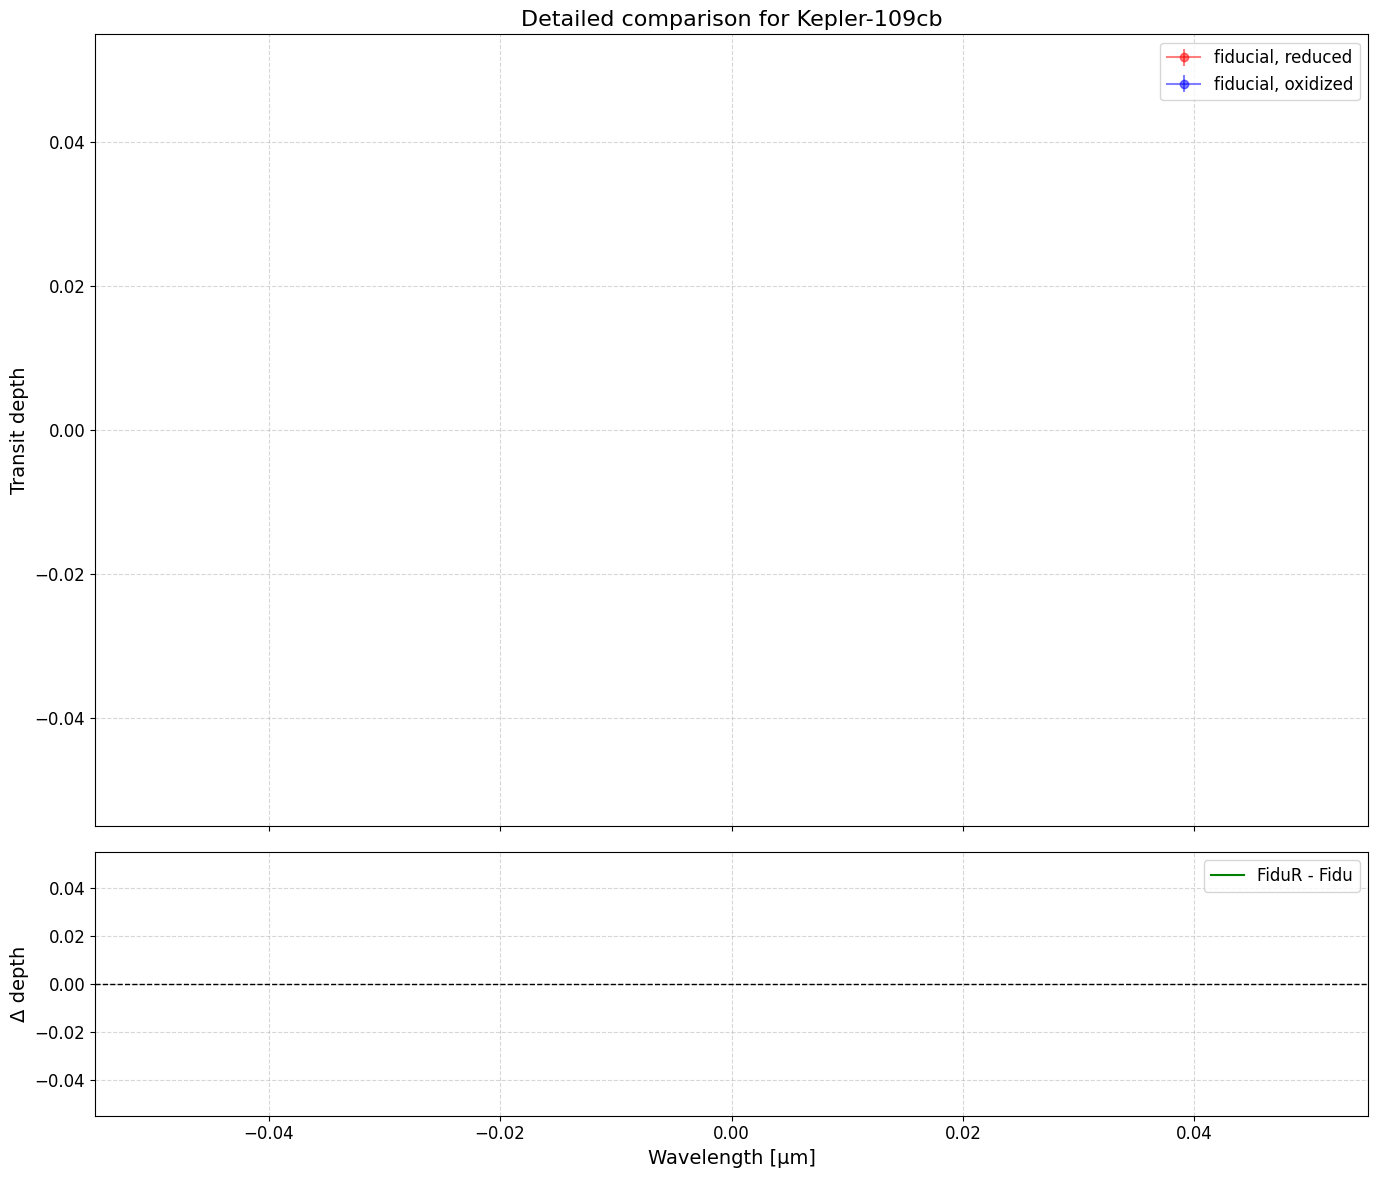

In [ ]:
# Definisci il pianeta che vuoi studiare
planet = "Kepler-109c"

modes = ['FiduR', 'Fidu']#, 'MigR', 'Mig']
colors = ['red', 'blue']# 'purple', 'green']

datasets = {}

for mode in modes:
    possible_names = [
        f"{planet}{mode}",
        f"{planet}_{mode}",
    ]
    file_found = None

    for name in possible_names:
        if name in subfolders_week5:
            file_found = (week5_directory, name)
            break
        elif name in subfolders_week4:
            file_found = (week4_directory, name)
            break

    if file_found is None:
        continue

    directory, file_ = file_found
    path = os.path.join(directory, file_, file_ + '.txt')

    try:
        data = np.loadtxt(path).T
        datasets[mode] = data
    except Exception as e:
        print(f"Errore nel caricare {path}: {e}")

# --- PLOT ---

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Primo plot: Transit depth per modalità
for mode, color in zip(modes, colors):
    if mode in datasets:
        data = datasets[mode]
        label = "effective migration" if "Mig" in mode else "fiducial"
        label += ", reduced" if "R" in mode else ", oxidized"
        ax1.errorbar(data[0], data[1], yerr=data[2], label=label, color=color, marker='o', linestyle='-', alpha=0.5)

ax1.set_ylabel('Transit depth')
ax1.set_title(f"Detailed comparison for {planet}b")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

diff_pairs = [('MigR', 'Mig'), ('FiduR', 'Fidu')]
diff_colors = ['purple', 'green']

for (mode1, mode2), diff_color in zip(diff_pairs, diff_colors):
    if mode1 in datasets and mode2 in datasets:
        data1 = datasets[mode1]
        data2 = datasets[mode2]
        if np.allclose(data1[0], data2[0]):
            # Stesso asse delle lunghezze d'onda
            diff = data1[1] - data2[1]
            ax2.plot(data1[0], diff, label=f"{mode1} - {mode2}", color=diff_color, linestyle='-')

ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Wavelength [μm]')
ax2.set_ylabel('Δ depth')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()
